# Life expectancy and GDP

In this project we are analysing the relationship between life expectancy and GDP for six countries. The sources of data are:
* World Health Organization
* World Bank

## Objectives

* Has life expectancy increased over time in the six nations?
* Has GDP increased over time in the six nations?
* Is there a correlation between GDP and life expectancy of a country?
* What is the distribution of that life expectancy?

## Task0. Data load and preparation

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns

colors = [c for c in mcolors.TABLEAU_COLORS]

df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [75]:
print(df.Country.value_counts())
print(df.dtypes)

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [76]:
# Let's rename the column "Life expectancy..." and United States to more friendly strings
df.rename(columns={'Life expectancy at birth (years)':'life_expect'},inplace=True)
mask=df.Country.str.contains('United')
df.loc[mask,'Country']='USA'
countries = df.Country.unique()

## Task 1. Has life expectancy increased over time?

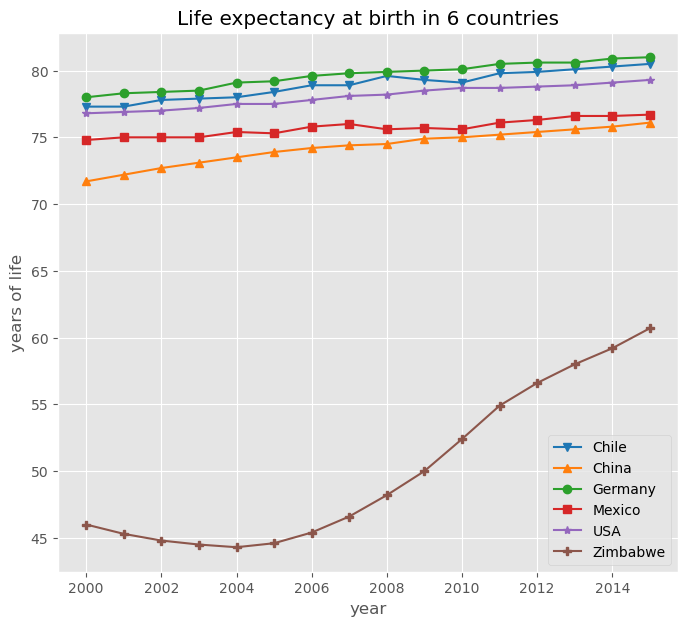

In [77]:
plt.style.use('ggplot')
fig0,axs0 = plt.subplots(figsize=(8,7))
markers = 'v^os*P'
for i, country in enumerate(countries):
    dfc = df.loc[df.Country==country]
    axs0.plot(dfc.Year,dfc.life_expect,marker=markers[i],label=country,color=colors[i])
axs0.set(title='Life expectancy at birth in 6 countries',xlabel='year',ylabel='years of life')
_ = plt.legend(loc='best')    

Life expectancy is slowly increasing in all countries except in **Zimbabwe**, that has a more faster increasing since 2005. Nevertheless, life expectancy in Zimbabwe is about 20 years below in comparison with the rest of the countries, and only reached 60 years in 2015.

## Task 2. Has GDP increased over time in the six nations?

First of all, let's define a currency formatting function to handle GDP as dollar trillions ($10^{12}$) or billions ($10^{9}$)

In [78]:
from matplotlib.ticker import FuncFormatter
def currency(x, pos): 
    if x > 5e11:
        return '${:1.1f}T'.format(x*1e-12)
    elif x > 1e9:
        return '${:1.1f}B'.format(x*1e-9)
formatter_y = FuncFormatter(currency)
formatter_x = FuncFormatter(lambda x, pos:'{:1.0f}'.format(x) )

Text(0.5, 0.98, 'GDP in dollar Billions ($10^9$) or Trillions($10^{12}$) ')

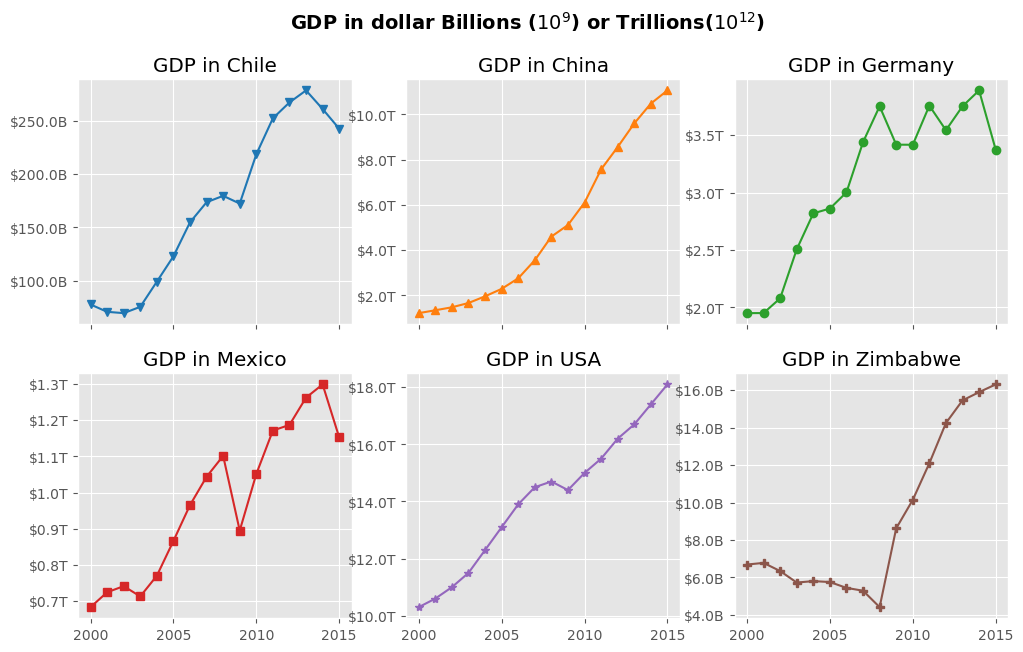

In [79]:
fig1,axs1 = plt.subplots(figsize=(12,7),nrows=2,ncols=3,sharey='none',sharex='all')

for i, country in enumerate(countries):
    r, c = i // 3, i % 3
    dfc = df.loc[df.Country==country]
    axs1[r,c].plot(dfc.Year,dfc.GDP,color=colors[i],marker=markers[i])
    axs1[r,c].yaxis.set_major_formatter(formatter_y)
    axs1[r,c].xaxis.set_major_formatter(formatter_x)
    axs1[r,c].set(title='GDP in {0}'.format(country))
fig1.suptitle('GDP in dollar Billions ($10^9$) or Trillions($10^{12}$) ', fontsize=14, fontweight='bold')  

We can see in the picture that the GDP has increased in the six nations.

## Task 3. Is there a correlation between GDP and life expectancy of a country?

With the helper function  **R2** we can calculate the **coefficient of determination** $R^2$, for a linear fit applied to the data of each country.

In [80]:
def R2(actual, predicted):
    num = ((actual - predicted)**2).sum()
    mean_actual = np.mean(actual)
    denom = ((actual - mean_actual)**2).sum()
    return 1 - num/denom

In addition to a scatter plot for each country, we plot as well a linear regression model, taking advantage of numpy **polifit** method.

Text(0.5, 0.98, 'Life expectancy vs GDP')

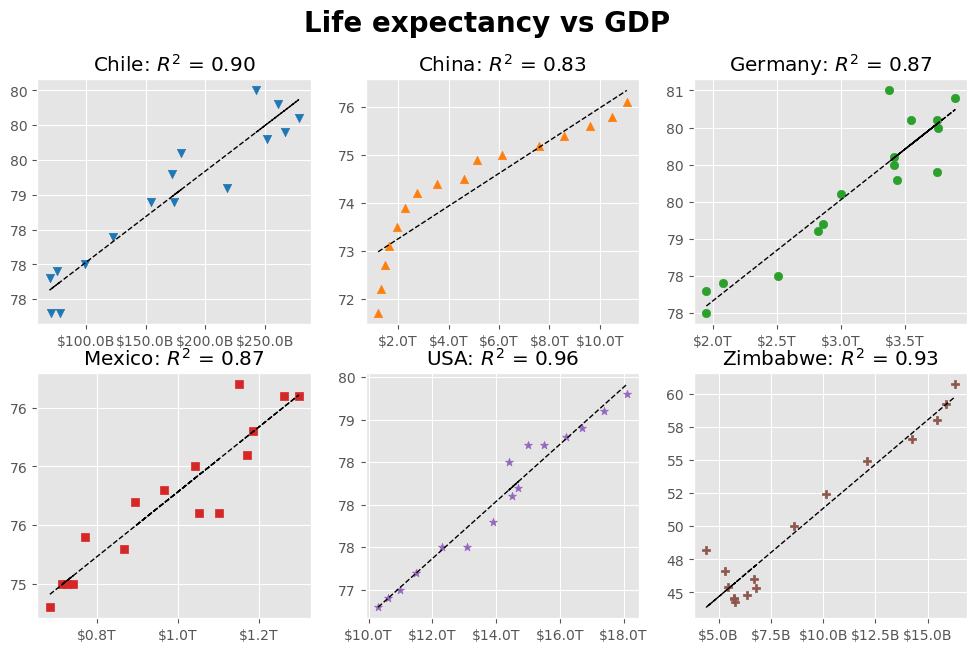

In [81]:
fig2,axs2 = plt.subplots(figsize=(12,7),nrows=2,ncols=3,sharey='none',sharex='none')
for i, country in enumerate(countries):
    r, c = i // 3, i % 3
    dfc = df.loc[df.Country==country]
    axs2[r,c].scatter(x=dfc.GDP,y=dfc.life_expect,color=colors[i],marker=markers[i])
    axs2[r,c].yaxis.set_major_formatter(formatter_x)
    axs2[r,c].xaxis.set_major_formatter(formatter_y)
    xm = dfc.GDP
    model=np.polynomial.polynomial.polyfit(x=xm,y=dfc.life_expect,deg=1)
    ym = np.polynomial.polynomial.polyval(xm,model)
    axs2[r,c].plot(xm, ym, color='black', linestyle='--',linewidth=1)
    axs2[r,c].set(title='{0}: $R^2$ = {1:1.2f}'.format(country,R2(dfc.life_expect,ym)))
fig2.suptitle('Life expectancy vs GDP', fontsize=20, fontweight='bold')  

As expected, there is a **strong correlation between GDP and life expectancy** in all countries. Taking into account the values of coefficient of determination $R^2$, in all countries **more than 80% of the variation in life expectancy** can be explained by the linear relationship with the GDP. It makes sense because the larger the GDP, we can expect more spend in healthcare and edution, better food for the population, etc.

## Task 4. What is the distribution and average of that life expectancy?

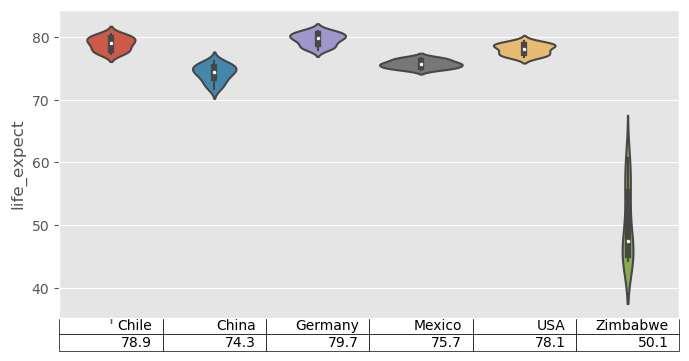

In [90]:
fig3,ax3 = plt.subplots(figsize=(8,4))
sns.violinplot(x='Country',y='life_expect',data=df,ax=ax3)
ax3.set(xticklabels=[],xlabel=None,xticks=[0]*6)
_ = ax3.table(cellText=[df.Country.unique(),df.groupby('Country').life_expect.mean().round(1)],
              loc='bottom')


The average of life expectancy in each country is shown in the table below the chart. **Germany** has the **highest** life expectancy in the group of 6 considered countries, about 80 years, whereas **Zimbabwe** has a life expectancy **well below** the other five. Nevertheless Zimbabwe has improved in the period 2000-2015 from 45 to 60 years in life expectancy.